**Importing important Libraries**




In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import shutil


2025-07-21 12:28:21.069143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753100901.247693      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753100901.301195      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
import cv2
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from torchinfo import summary
import torchvision.models as models
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import OrderedDict
import platform
import psutil
import random
import glob
from tqdm import tqdm
from PIL import Image
from torchvision import transforms
from torchvision.transforms import ColorJitter, RandomRotation, RandomResizedCrop
from torchvision.transforms.functional import gaussian_blur
from PIL import ImageOps
from tabulate import tabulate

In [3]:
cpu_info = platform.processor()

ram_info = psutil.virtual_memory()
total_ram_gb = ram_info.total / (1024 ** 3)

try:
    gpu_info = !nvidia-smi --query-gpu=gpu_name --format=csv
    gpu_name = gpu_info[1]
except:
    gpu_name = "No GPU available"

print("CPU:", cpu_info)
print("Total RAM (GB):", round(total_ram_gb, 2))
print("GPU:", gpu_name)

CPU: x86_64
Total RAM (GB): 31.35
GPU: Tesla P100-PCIE-16GB


In [4]:
import random
import numpy as np
import tensorflow as tf

# Set seeds for reproducibility
seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [5]:

DATASET_PATH = "/kaggle/input/rice-varieties-in-bangladesh/Augmented"

IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 100

# Preprocessing with Validation Split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())


Found 60800 images belonging to 38 classes.
Found 15200 images belonging to 38 classes.


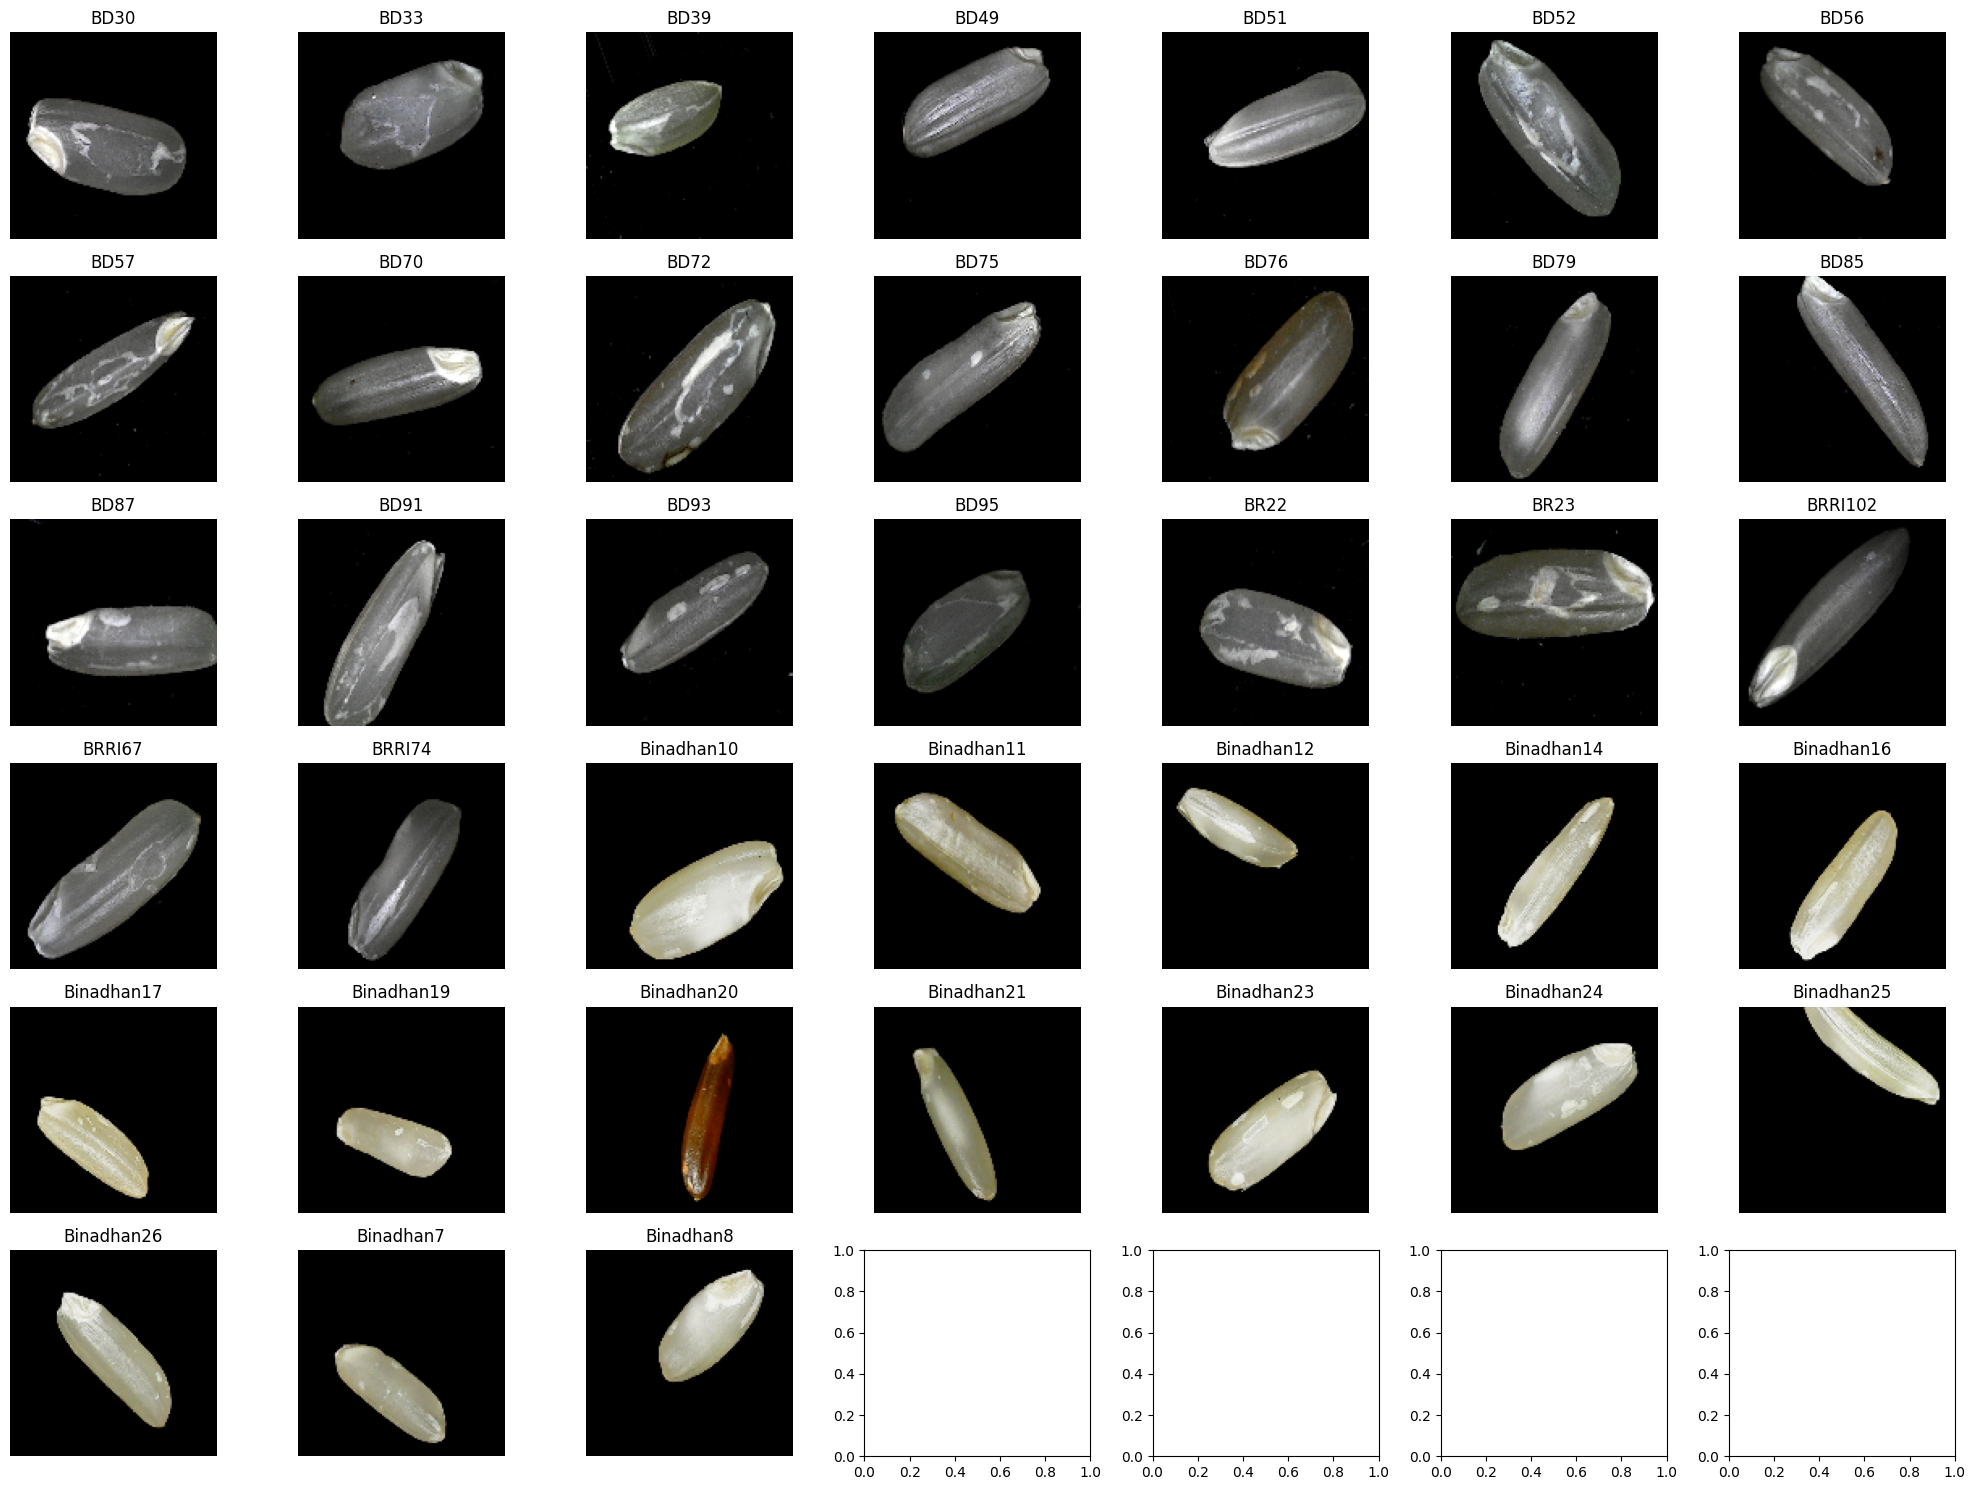

In [6]:
#Show 1 Image per Class (Best Sample from Validation Set)

fig, axes = plt.subplots(6, 7, figsize=(20, 15))
shown = set()

for i, (images, labels) in enumerate(val_generator):
    for img, label in zip(images, labels):
        label_index = np.argmax(label)
        class_name = class_names[label_index]
        if class_name not in shown:
            ax = axes[len(shown)//7, len(shown)%7]
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis('off')
            shown.add(class_name)
            if len(shown) == len(class_names):
                break
    if len(shown) == len(class_names):
        break

plt.tight_layout()
plt.show()


In [7]:
# Build Custom CNN

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753101036.948312      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [8]:
# Compile the Model

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
#Train the Model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1753101042.799340      77 service.cc:148] XLA service 0x7ac748002370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753101042.800055      77 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753101043.229514      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1900 ━━━━━━━━━━━━━━━━━━━━ 4:12:10 8s/step - accuracy: 0.0000e+00 - loss: 6.3217

I0000 00:00:1753101046.710853      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1900/1900 ━━━━━━━━━━━━━━━━━━━━ 423s 218ms/step - accuracy: 0.1290 - loss: 3.3010 - val_accuracy: 0.2482 - val_loss: 2.7120
Epoch 2/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 169s 89ms/step - accuracy: 0.3062 - loss: 2.2323 - val_accuracy: 0.5345 - val_loss: 1.5528
Epoch 3/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 164s 87ms/step - accuracy: 0.4005 - loss: 1.8463 - val_accuracy: 0.4906 - val_loss: 1.5672
Epoch 4/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 160s 84ms/step - accuracy: 0.4627 - loss: 1.6218 - val_accuracy: 0.5992 - val_loss: 1.2391
Epoch 5/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 166s 87ms/step - accuracy: 0.5079 - loss: 1.4687 - val_accuracy: 0.5209 - val_loss: 1.4416
Epoch 6/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 159s 84ms/step - accuracy: 0.5470 - loss: 1.3394 - val_accuracy: 0.2059 - val_loss: 8.1206
Epoch 7/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 169s 89ms/step - accuracy: 0.5706 - loss: 1.2534 - val_accuracy: 0.5128 - val_loss: 1.7356
Epoch 8/100
1900/1900 ━━━━━━━━━━━━━━━━━━━━ 167s 88ms/step - accuracy: 0.5

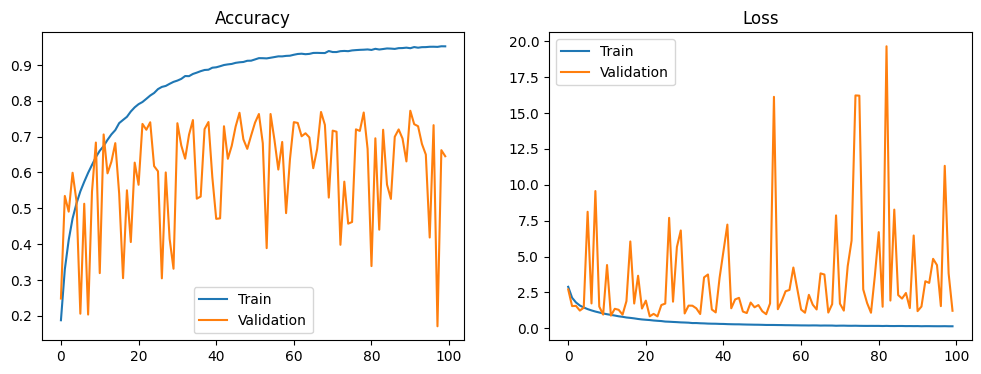

In [10]:
# Step 8: Plot Accuracy & Loss

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step


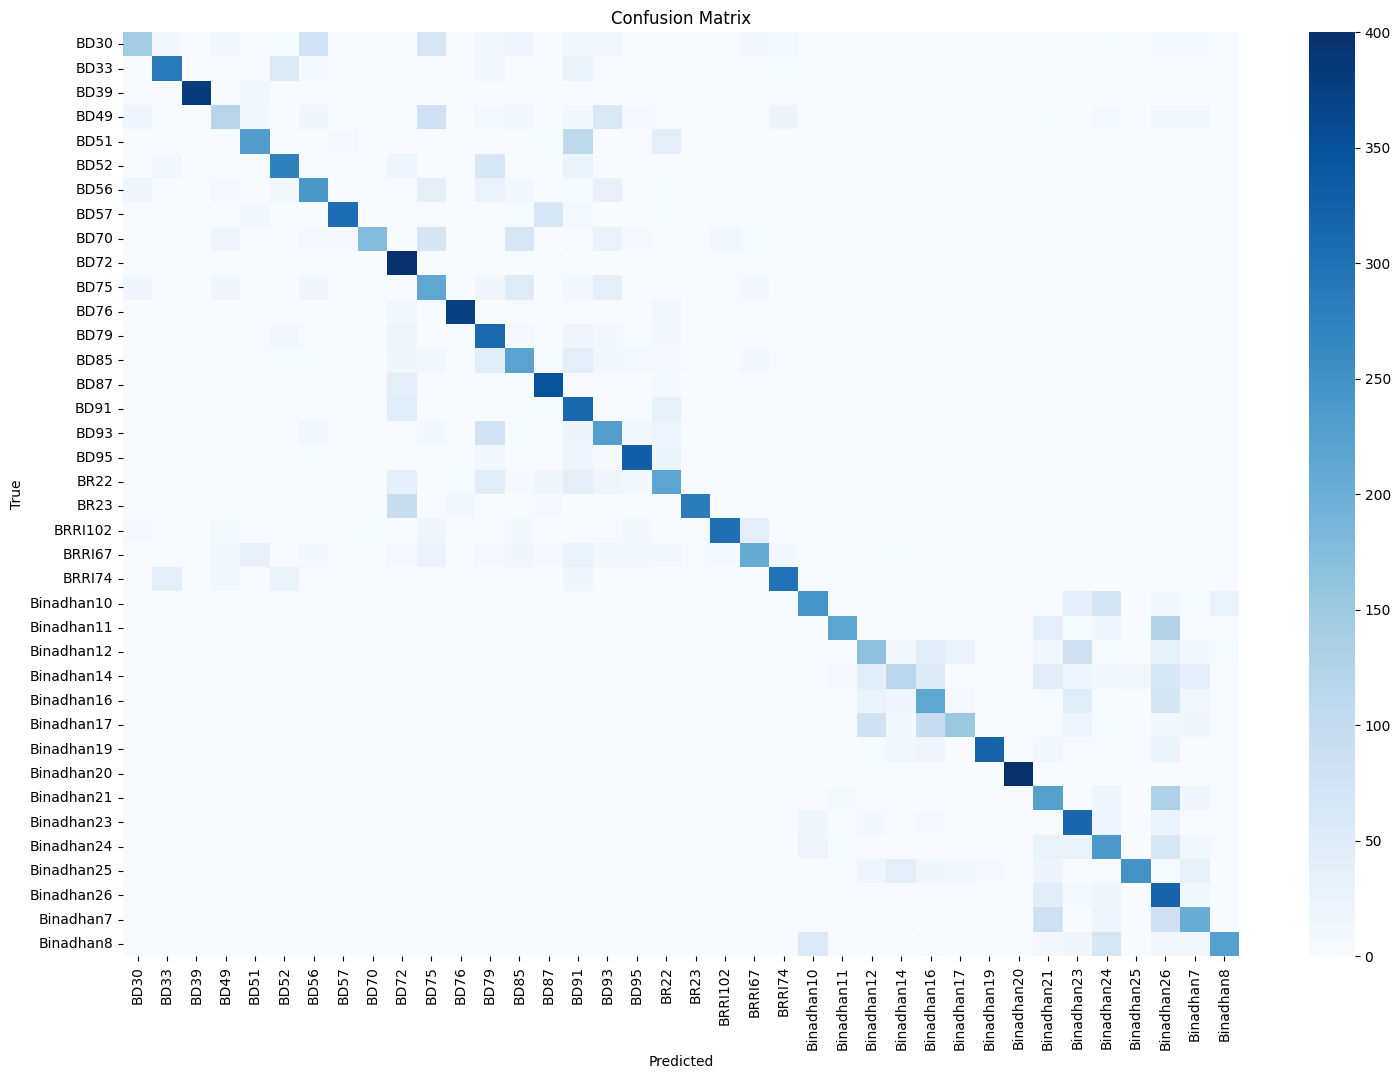

              precision    recall  f1-score   support

        BD30       0.68      0.35      0.47       400
        BD33       0.81      0.71      0.76       400
        BD39       0.98      0.95      0.96       400
        BD49       0.58      0.30      0.40       400
        BD51       0.75      0.58      0.65       400
        BD52       0.70      0.69      0.69       400
        BD56       0.59      0.60      0.60       400
        BD57       0.94      0.76      0.84       400
        BD70       0.94      0.45      0.60       400
        BD72       0.58      0.99      0.73       400
        BD75       0.40      0.54      0.46       400
        BD76       0.94      0.94      0.94       400
        BD79       0.49      0.78      0.60       400
        BD85       0.52      0.55      0.54       400
        BD87       0.76      0.87      0.81       400
        BD91       0.45      0.78      0.57       400
        BD93       0.48      0.57      0.52       400
        BD95       0.80    

In [11]:
#Classification Report & Confusion Matrix

Y_true = val_generator.classes
Y_pred_probs = model.predict(val_generator)
Y_pred = np.argmax(Y_pred_probs, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(18, 12))
sns.heatmap(cm, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(Y_true, Y_pred, target_names=class_names))


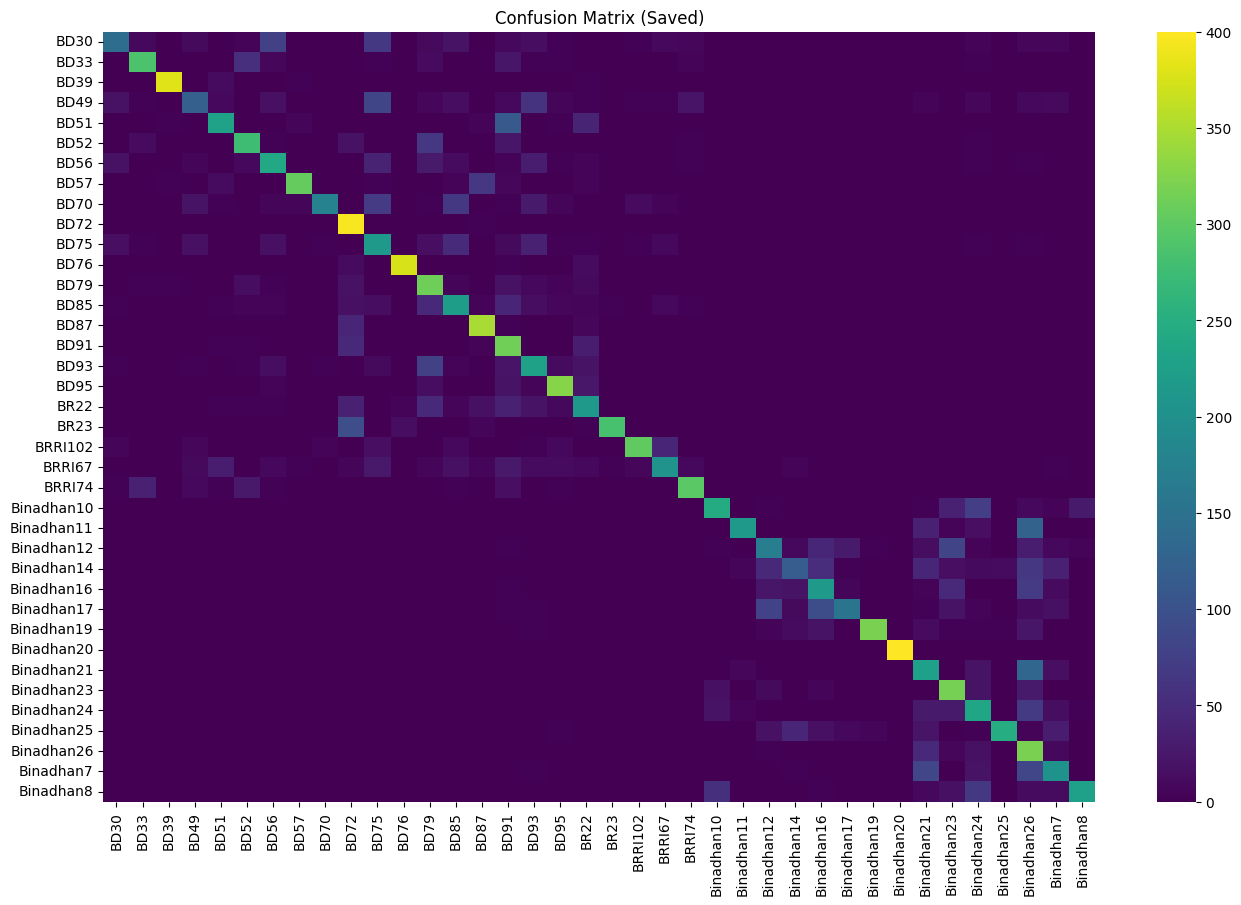

In [12]:
#Save Model and Report Outputs

# Create output directory
os.makedirs('/kaggle/working/rice_model', exist_ok=True)

# Save model
model.save('/kaggle/working/rice_model/custom_rice_model.h5')

# Save classification report
report_text = classification_report(Y_true, Y_pred, target_names=class_names)
with open('/kaggle/working/rice_model/classification_report.txt', 'w') as f:
    f.write(report_text)

# Copy Confusion Matrix as image
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot=False, cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Saved)')
plt.savefig('/kaggle/working/rice_model/confusion_matrix.png')
